In [1]:
pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 78.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939414 sha256=50aab913766f33d558473584c788c0eb54f80619f7cbaf5a57218d831a4734fd
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


*Import all dependencies*

In [2]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

initiated datasets repo at: /root/.pydataset/


*Get the dataset*

In [3]:
data_set=data('Pima.tr')
print(data_set)

     npreg  glu  bp  skin   bmi    ped  age type
1        5   86  68    28  30.2  0.364   24   No
2        7  195  70    33  25.1  0.163   55  Yes
3        5   77  82    41  35.8  0.156   35   No
4        0  165  76    43  47.9  0.259   26   No
5        0  107  60    25  26.4  0.133   23   No
..     ...  ...  ..   ...   ...    ...  ...  ...
196      2  141  58    34  25.4  0.699   24   No
197      7  129  68    49  38.5  0.439   43  Yes
198      0  106  70    37  39.4  0.605   22   No
199      1  118  58    36  33.3  0.261   23   No
200      8  155  62    26  34.0  0.543   46  Yes

[200 rows x 8 columns]


*Visualize the dependent and independent variables using a scatterplot*


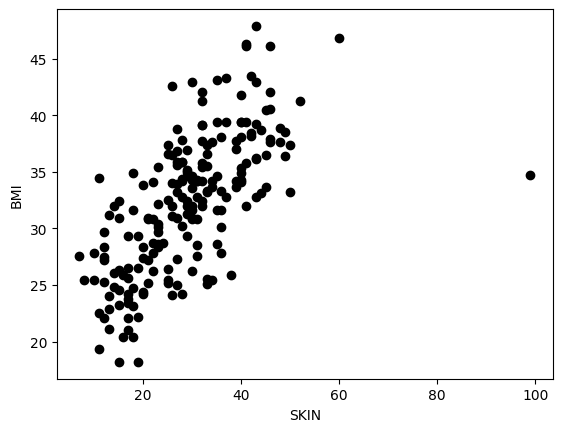

In [4]:
plt.scatter(data_set.skin,data_set.bmi,color='black')
plt.xlabel("SKIN")
plt.ylabel("BMI")
plt.show()

*Code to calculate the Mean Squared Error for the given data points*

In [5]:
def MSE(m,b,data):
  tot_err=0
  for i in range(len(data_set)):
    x=data.iloc[i].skin
    y=data.iloc[i].bmi
    tot_err=tot_err+((y-(m*x)+b)**2)
  tot_err/float(len(data))

*Perform Gradient Descent*


```
# Note that this method was performed on Y = m*X + b, a straight line equation where m=slope of the line and b=Y-intercept of the line.
```



In [6]:
def greadient_descent(m_new,b_new,data,alpha):
  m_gradient=0
  b_gradient=0
  n=len(data)
  for i in range(n):
    x=data.iloc[i].skin
    y=data.iloc[i].bmi
    m_gradient+= -(2/n) * x * (y-(m_new * x + b_new))
    b_gradient+= -(2/n) * (y-(m_new * x + b_new))
  m=m_new-m_gradient*alpha
  b=b_new-b_gradient*alpha
  return m,b

In [7]:
m=0
b=0
alpha=0.00001
iterations=350

*Training and Results*

In [8]:
for i in range(iterations):
  if i%50==0:
    print("This is the",i ,"th Epoch")
  m,b=greadient_descent(m,b,data_set,alpha)
print(m,b)

This is the 0 th Epoch
This is the 50 th Epoch
This is the 100 th Epoch
This is the 150 th Epoch
This is the 200 th Epoch
This is the 250 th Epoch
This is the 300 th Epoch
0.9984633172748699 0.05092668839900601


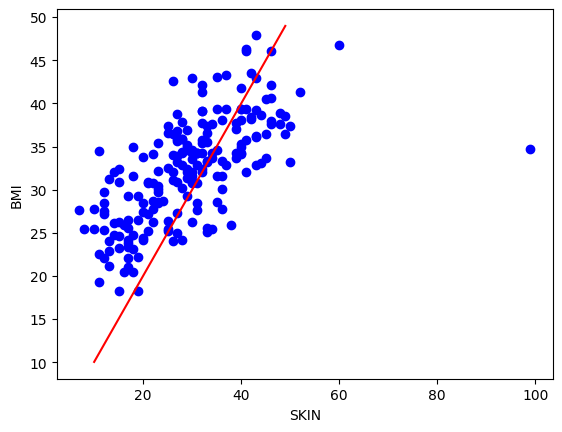

In [9]:
plt.scatter(data_set.skin,data_set.bmi,color='blue')
plt.plot(list(range(10,50)),[m*x + b for x in range(10,50)],color='red')
plt.xlabel("SKIN")
plt.ylabel("BMI")
plt.show()

In [10]:
x=[10,15,25,30,35,40] #Predictions after implemting from scratch
for bmi in x:
  y=m*bmi + b
  print(y)

10.035559861147705
15.027876447522054
25.012509620270755
30.004826206645102
34.99714279301946
39.98945937939381


*Model using library:*


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(data_set.skin,data_set.bmi)

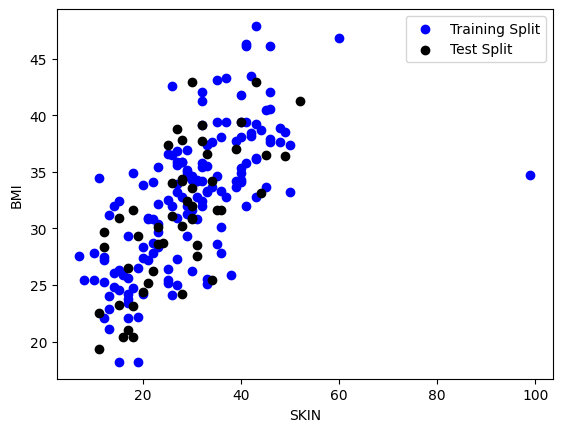

In [13]:
plt.scatter(x_train,y_train,label='Training Split',color='blue')
plt.scatter(x_test,y_test,label='Test Split',color='black')
plt.xlabel("SKIN")
plt.ylabel("BMI")
plt.legend()

In [14]:
Lreg=LinearRegression()
Lreg.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

In [15]:
predict=Lreg.predict(x_test.values.reshape(-1,1))

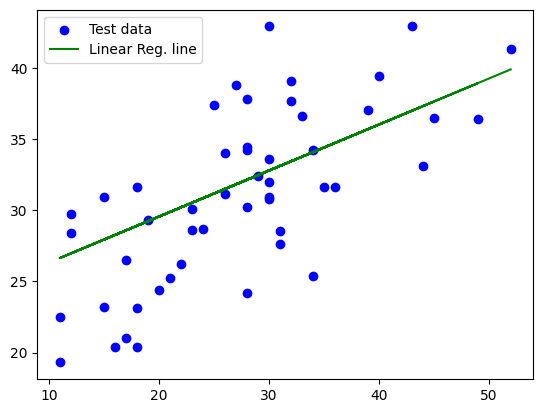

In [16]:
plt.scatter(x_test,y_test,label='Test data', color='b')
plt.plot(x_test,predict,label='Linear Reg. line',color='g')

plt.legend()
plt.show()

In [17]:
x=[10,15,25,30,35,40] # Predictions using ML library
for i in x:
  predictions=Lreg.predict(np.array([[i]]))[0]
  print(predictions)


26.309362508253344
27.92537262202433
31.1573928495663
32.77340296333728
34.389413077108266
36.00542319087925
